<a href="https://colab.research.google.com/github/zohaib304/MachineLearning/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

Dataset -> [View](https://drive.google.com/file/d/1kWjqAPq9hZTgydpS8cIkpOonmyBLGTDd/view?usp=sharing)

In [2]:
data = pd.read_csv("/content/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
y = y.reshape(len(y), 1)

In [7]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Feature Scaling

In [8]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [9]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [10]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [11]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [12]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting

In [13]:
pred = regressor.predict(sc_X.transform([[6.5]]))

In [14]:
sc_y.inverse_transform(pred)

array([170370.0204065])

### Visualizing

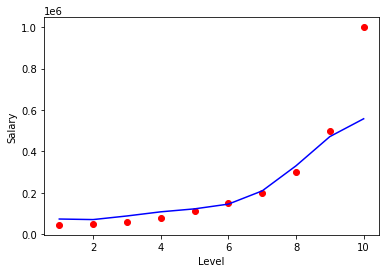

In [15]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
# plt.plot(X_g, regressor.predict(regressor.fit_transform(X_grid)), color='blue')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

### Smooth 

In [20]:
regressor.epsilon

0.1

In [21]:
-regressor.epsilon

-0.1

### Plotting epsilon tube

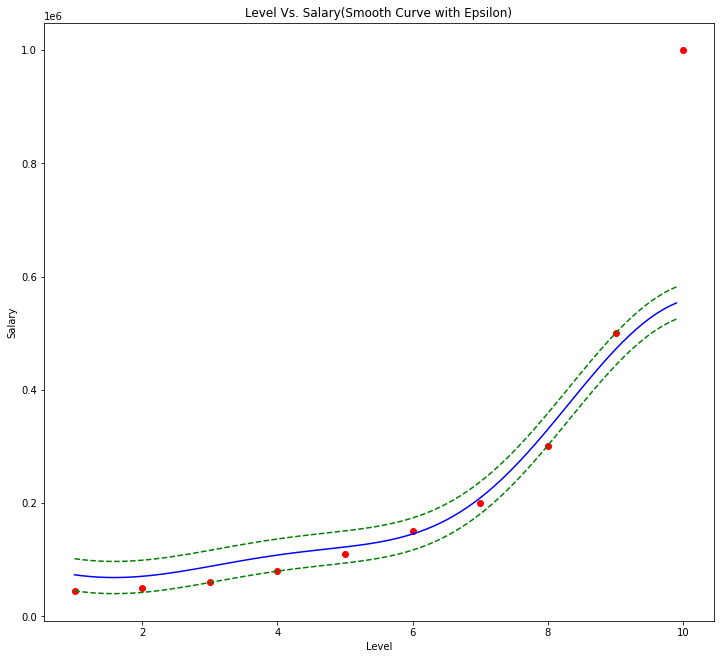

In [17]:
X_grid = np.arange(1,10,0.1).reshape(-1,1)
 
plt.figure(figsize=(12,11))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y),color = "red")
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))),color = 'blue')
plt.plot(X_grid,sc_y.inverse_transform(regressor.epsilon+regressor.predict(sc_X.transform(X_grid))),color = 'green',linestyle="dashed")
plt.plot(X_grid,sc_y.inverse_transform(-regressor.epsilon+regressor.predict(sc_X.transform(X_grid))),color = 'green',linestyle="dashed")
plt.title('Level Vs. Salary(Smooth Curve with Epsilon)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

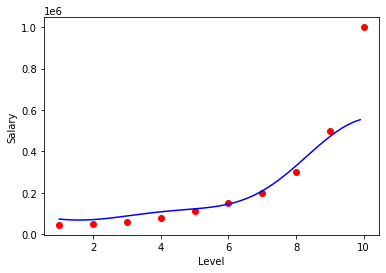

In [18]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()